##Carregando os dados

In [81]:
from google.colab import drive
drive.mount('/content/drive')

# importando todas as bibliotecas importantes para cálculo e criação de visualização gráfica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# importando o arquivo
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit.csv', sep=',')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


##Informações

In [82]:
# Dimensão
print(df.shape)

(1000, 21)


In [83]:
# Resumo estatístico
print(df.describe())

       Creditability  Account Balance  Duration of Credit (month)  \
count    1000.000000      1000.000000                 1000.000000   
mean        0.700000         2.577000                   20.903000   
std         0.458487         1.257638                   12.058814   
min         0.000000         1.000000                    4.000000   
25%         0.000000         1.000000                   12.000000   
50%         1.000000         2.000000                   18.000000   
75%         1.000000         4.000000                   24.000000   
max         1.000000         4.000000                   72.000000   

       Payment Status of Previous Credit      Purpose  Credit Amount  \
count                         1000.00000  1000.000000     1000.00000   
mean                             2.54500     2.828000     3271.24800   
std                              1.08312     2.744439     2822.75176   
min                              0.00000     0.000000      250.00000   
25%               

In [84]:
# Distribuição de classe
print(df.groupby('Creditability').size())

Creditability
0    300
1    700
dtype: int64


In [85]:
print(df.head())

   Creditability  Account Balance  Duration of Credit (month)  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment Status of Previous Credit  Purpose  Credit Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value Savings/Stocks  Length of current employment  Instalment per cent  \
0                     1                             2                    4   
1                     1                             3               

In [86]:
print(df.shape)

(1000, 21)


##Visualização dos dados

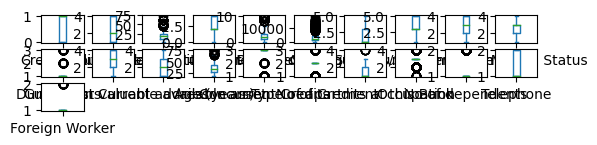

In [87]:
# gráfico de box and whisker
df.plot(kind='box', subplots=True, layout=(11,10), sharex=False, sharey=False)
plt.show()

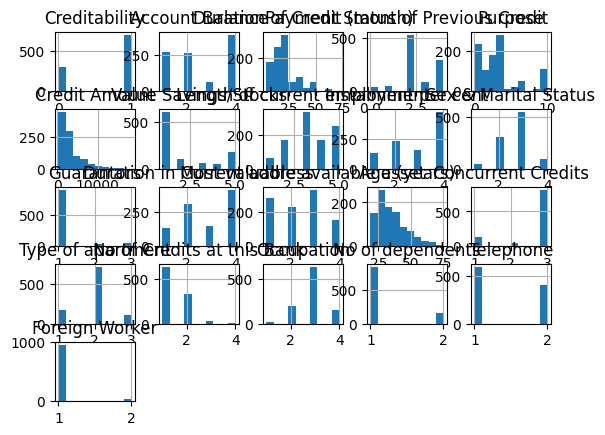

In [88]:
# histograma
df.hist()
plt.show()

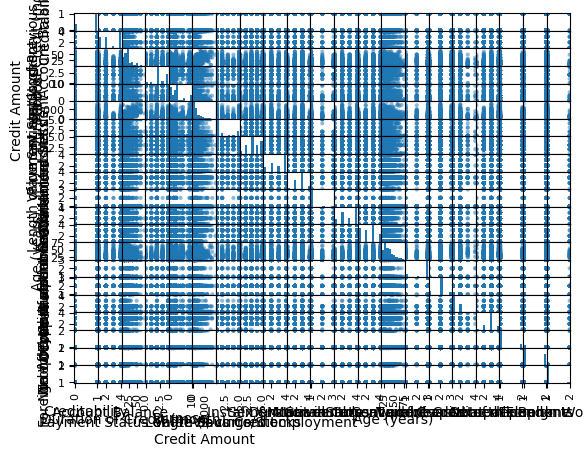

In [89]:
# gráfico de dispersão
scatter_matrix(df)
plt.show()

##Criar conjunto de validação

In [90]:
# Conjunto de Validação
array = df.values
#X = array[:,1:20]
#Y = array[:,0:1]
X = df.drop('Creditability', axis=1)
Y = df['Creditability']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_train.shape)
print(Y_train.shape)

print(X_validation.shape)
print(Y_validation.shape)

(800, 20)
(800,)
(200, 20)
(200,)


In [91]:
# Métricas
seed = 7
scoring = 'accuracy'

### Regressão Logística (LR)
### Análise Linear Discriminante (LDA)
### K-vizinhos mais próximos (KNN)
### Árvores de Classificação (Decision Tree) e Regressão (CART)
### Gaussian Naive Bayes (NB)
### Support Vector Machines (SVM)

In [92]:
# Algoritmos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Avaliação de cada modelo
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

   #print(cv_results)

LR: 0.753750 (0.038345)
LDA: 0.770000 (0.030721)
KNN: 0.675000 (0.037914)
CART: 0.692500 (0.040389)
NB: 0.746250 (0.040716)
SVM: 0.706250 (0.055972)


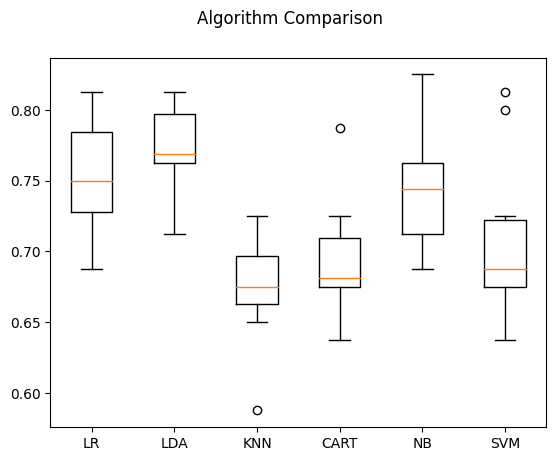

In [93]:
# Comparação dos Algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [94]:
# Precisão do modelo no conjunto de validação
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.64
[[ 11  54]
 [ 18 117]]
              precision    recall  f1-score   support

           0       0.38      0.17      0.23        65
           1       0.68      0.87      0.76       135

    accuracy                           0.64       200
   macro avg       0.53      0.52      0.50       200
weighted avg       0.59      0.64      0.59       200



In [95]:
# Precisão do modelo no conjunto de validação
# dtc = DecisionTreeClassifier()
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)
predictions = svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.675
[[  0  65]
 [  0 135]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.68      1.00      0.81       135

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.54       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
# Precisão do modelo no conjunto de validação
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7
[[ 23  42]
 [ 18 117]]
              precision    recall  f1-score   support

           0       0.56      0.35      0.43        65
           1       0.74      0.87      0.80       135

    accuracy                           0.70       200
   macro avg       0.65      0.61      0.61       200
weighted avg       0.68      0.70      0.68       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
# Precisão do modelo no conjunto de validação
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.73
[[ 26  39]
 [ 15 120]]
              precision    recall  f1-score   support

           0       0.63      0.40      0.49        65
           1       0.75      0.89      0.82       135

    accuracy                           0.73       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.72      0.73      0.71       200



In [98]:
# Precisão do modelo no conjunto de validação
adc = DecisionTreeClassifier()
adc.fit(X_train, Y_train)
predictions = adc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.685
[[38 27]
 [36 99]]
              precision    recall  f1-score   support

           0       0.51      0.58      0.55        65
           1       0.79      0.73      0.76       135

    accuracy                           0.69       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.70      0.69      0.69       200



In [99]:
# Precisão do modelo no conjunto de validação
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.69
[[ 36  29]
 [ 33 102]]
              precision    recall  f1-score   support

           0       0.52      0.55      0.54        65
           1       0.78      0.76      0.77       135

    accuracy                           0.69       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.70      0.69      0.69       200

